# Исследование надежности заемщиков


## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуйте данные и ответьте на вопросы

**Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data['children'].value_counts()

0    14107
1     4809
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

In [23]:
import seaborn as sns
from scipy.stats import trim_mean
import matplotlib.pyplot as plt

grouped_mean = data.groupby('children')['debt'].mean()
grouped_trim_mean = data.groupby('children')['debt'].agg(trim_mean, 0.03)

display(grouped_mean)
display(grouped_trim_mean)

children
0    0.075353
1    0.092327
2    0.094542
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

children
0    0.048262
1    0.066357
2    0.068912
3    0.057692
4    0.076923
5    0.000000
Name: debt, dtype: float64

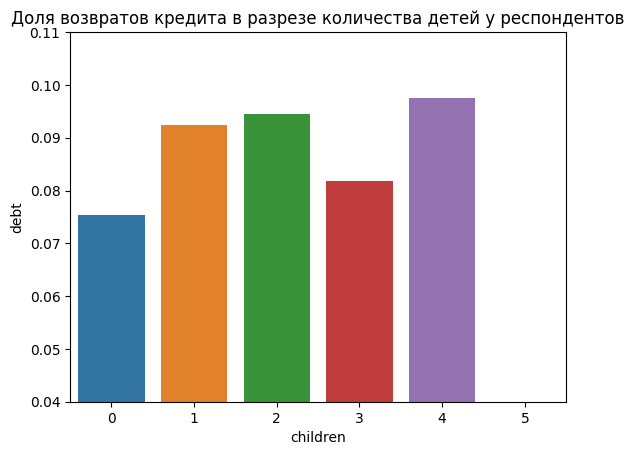

In [24]:
sns.barplot(x=grouped_mean.index,
            y=grouped_mean)
plt.ylim((0.04, 0.11))
plt.title('Доля возвратов кредита в разрезе количества детей у респондентов')
plt.show()

**Вывод:** 
    Зависимая переменная (debt) является бинарной, в связи с чем отражение зависимости через визуальный ряд представляется затруднительным. Поэтому были рассмотрены средние значения зависимой переменной (debt) в разрезе независимой переменной (children). Стоит так же отметить весьма очевидную несбалансированноть данных по переменной children (логично ожидать, что людей с 5 детьми на порядки меньше, чем с 1 ребенком).
    На сгруппированных данных явно представлен выброс для респондентов, имеющих по 5 детей. Для генеральной совокупности это означало бы, что наличие 5 детей магическим образом лишает тебя всех финансовых проблем. Но в данном случае, скорее всего, имеет место быть несбалансированность выборки по респондентам с 4 и 5 детьми. В частности, как мы можем наблюдать респондентов с 4 детьми - 41, а с 5 - всего 9. В связи с чем представляется разумным отбросить из рассмотрения респондентов с 5 детьми.
        Таким образом, исходя из сгруппированных данных респонденты, не имеющие детей действительно несколько реже склонны иметь не возвращать кредиты в срок, чем респонденты, имеющие детей. При этом стоит отметить интересную особенность респондентов, имеющих по 3 ребенка - и хоть их склонность иметь долги выше, чем у бездетных респондентов, они все же в целом несколько "благонадежнее" других респондентом с детьми. Если это не явлется случайным "перекосом", то о природе такой аномалии можно только догадываться.

**Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [25]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
display(data['family_status'].value_counts())
grouped_family = data.groupby('family_status')['debt'].mean()
display(grouped_family)

женат / замужем          12266
гражданский брак          4146
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
Name: family_status, dtype: int64

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.092861
женат / замужем          0.075575
Name: debt, dtype: float64

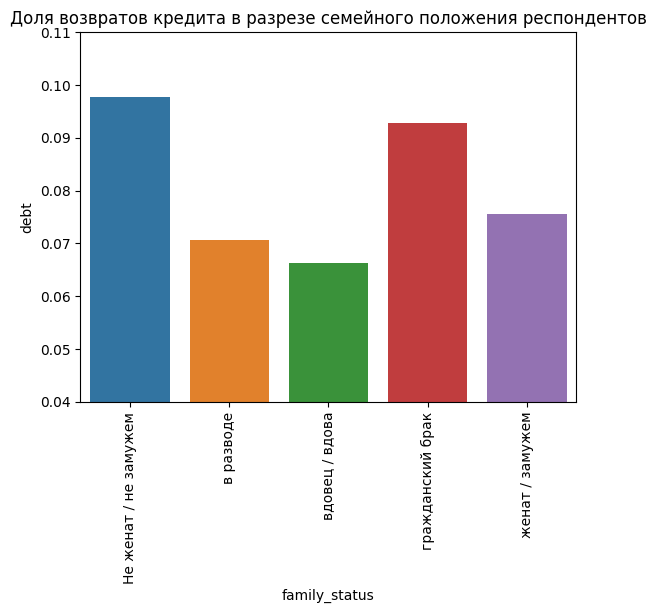

In [26]:
sns.barplot(x=grouped_family.index,\
            y=grouped_family)
plt.ylim((0.04, 0.11))
plt.title('Доля возвратов кредита в разрезе семейного положения респондентов')
plt.xticks(rotation=90)
plt.show()

**Вывод:** Отвечая на прямой вопрос "Есть ли зависимость между семейным положением и возвратом кредита в срок?" по графику можно судить, что семейный статус действительно влияет на возврат кредита в срок. Конечно, максимальная абсолютная разница составляет всего несколько процентов, но при этом абсолютная - доходит до 47%.

**Наблюдения:**
При группировке по переменной family_status мы также можем наблюдать несбалансированность классов, хоть и не настолько сильную, как в первом случае. По сгруппированным данным можно увидеть, что семейный статус будто готов сформировать две подруппы с "не женат / не замужем, гражданский брак" в одной группе и "в разводе, вдовец / вдова, женат / замужем" в другой. Хотя объективно оценить такую группировку не предсталяется возможным, в качестве гипотезы можно было бы рассмотреть зависимость возврата кредита и бинарной перемный "состоял/состоит в браке".

**Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [27]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
display(data['total_income_category'].value_counts())
grouped_income = data.groupby('total_income_category')['debt'].mean()
display(grouped_income)

C    15938
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

total_income_category
A    0.080000
B    0.070602
C    0.084891
D    0.060172
E    0.090909
Name: debt, dtype: float64

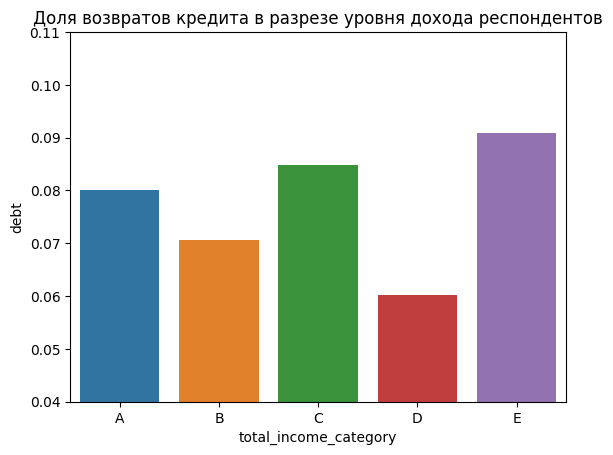

In [28]:
sns.barplot(x=grouped_income.index,\
            y=grouped_income)
plt.ylim((0.04, 0.11))
plt.title('Доля возвратов кредита в разрезе уровня дохода респондентов')
plt.show()

**Вывод:** В данном задании мы в очередной раз встречемся с ситуацией, когда количество наблюдений по некоторым категорям крайне мало относитльно общего количества наблюдений. Таким образом, даже если мы выкинем из обзора категории А и Е,  то все еще может заметить весьма существенное различие в уровне возврата кредита в категориях B, C и D.

**Наблюдения:** В глаза сразу бросается весьма интересная особенность - респонденты с очень высокими доходами (A и B) имеют весьма сопоставимый с остальными респондентами уровень по просрочке кредитов, что, на первый взгляд, может казаться даже контринтуитивным (на второй-то взгляд становится очевидно, что объемы кредитов для таких респондентов, скорее всего, соответствующие).

**Задание 22. Как разные цели кредита влияют на его возврат в срок?**

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
display(data['purpose_category'].value_counts())
grouped_purpose = data.groupby('purpose_category')['debt'].mean()
display(grouped_purpose)

операции с недвижимостью    10754
операции с автомобилем       4281
получение образования        3989
проведение свадьбы           2324
Name: purpose_category, dtype: int64

purpose_category
операции с автомобилем      0.093436
операции с недвижимостью    0.072531
получение образования       0.092504
проведение свадьбы          0.078744
Name: debt, dtype: float64

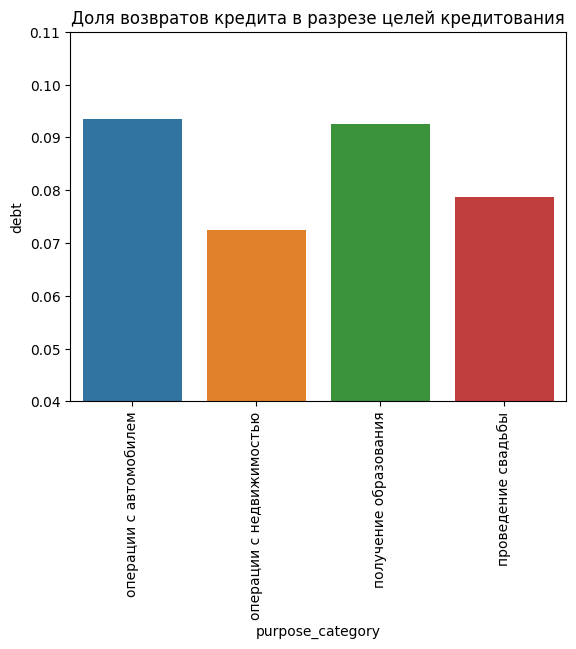

In [30]:
sns.barplot(x=grouped_purpose.index,\
            y=grouped_purpose)
plt.ylim((0.04, 0.11))
plt.title('Доля возвратов кредита в разрезе целей кредитования')
plt.xticks(rotation=90)
plt.show()

In [31]:
grouped_combined = data.groupby(['total_income_category', 'purpose_category'])['debt'].mean()
grouped_combined

total_income_category  purpose_category        
A                      операции с автомобилем      0.000000
                       операции с недвижимостью    0.058824
                       получение образования       0.250000
                       проведение свадьбы          0.000000
B                      операции с автомобилем      0.083170
                       операции с недвижимостью    0.067240
                       получение образования       0.077528
                       проведение свадьбы          0.051471
C                      операции с автомобилем      0.095822
                       операции с недвижимостью    0.074875
                       получение образования       0.098507
                       проведение свадьбы          0.087356
D                      операции с автомобилем      0.138889
                       операции с недвижимостью    0.035714
                       получение образования       0.026667
                       проведение свадьбы          0

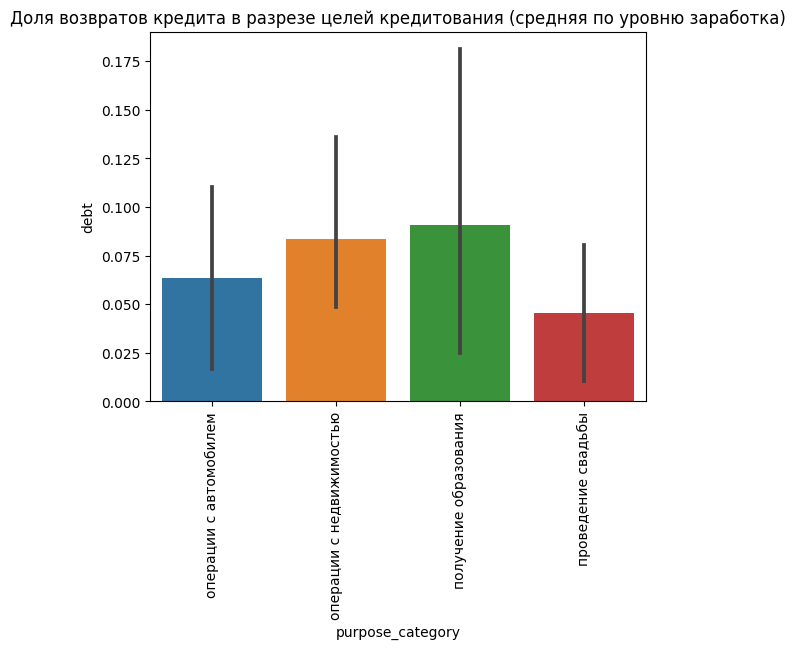

In [32]:
sns.barplot(x=grouped_combined.index.get_level_values(1), y=grouped_combined)
plt.xticks(rotation=90)
plt.title('Доля возвратов кредита в разрезе целей кредитования (средняя по уровню заработка)')
plt.show()

**Вывод:** Из графиков видно, что цель кредита и возвращение кредита весьма связанные вещи, в особенности с учетом совокупных доходов. Можно заметиль (пускай и на небольшой выборке), что респонденты из группы А (доход > 1 млн.) с вероятностью 25% не возвращали кредит на образование вовремя (вероятно дорогостоящее образование). Или, например респонденты из группы Е (< 30 тыс.) с вероятностью в 18% могут не отдать кредиты, связанные с недвижимость.

**Задание 23. Приведите возможные причины появления пропусков в исходных данных.**

In [33]:
try:
    orig_data = pd.read_csv('/datasets/data.csv')
except:
    orig_data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
    
na_data = orig_data[orig_data['total_income'].isna()]
cleared_data = orig_data.dropna()

def years_category(value):
    if value < 10:
        return '0*'
    elif value < 20:
        return '1*'
    elif value < 30:
        return '2*'
    elif value < 40:
        return '3*'
    elif value < 50:
        return '4*'
    elif value < 60:
        return '5*'
    elif value < 70:
        return '6*'
    elif value < 80:
        return '7*'
    elif value < 90:
        return '8*'
    else:
        'out of frame'

/tmp/ipykernel_1847224/3890305792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_data['years_category'] = na_data['dob_years'].apply(years_category)


<AxesSubplot: xlabel='years_category'>

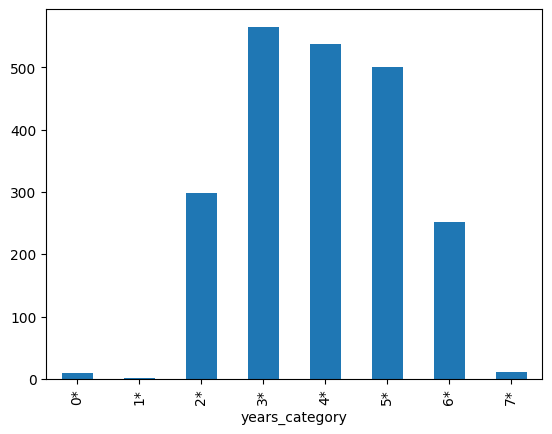

In [34]:
na_data['years_category'] = na_data['dob_years'].apply(years_category)
na_data.groupby('years_category')['years_category'].count().plot.bar()

/tmp/ipykernel_1847224/2010759825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleared_data['years_category'] = cleared_data['dob_years'].apply(years_category)


<AxesSubplot: xlabel='years_category'>

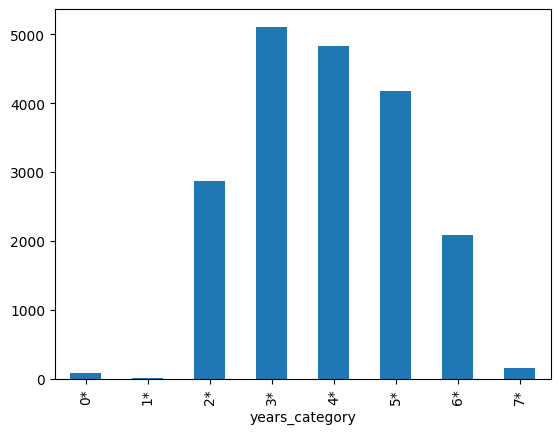

In [35]:
cleared_data['years_category'] = cleared_data['dob_years'].apply(years_category)
cleared_data.groupby('years_category')['years_category'].count().plot.bar()

*Ответ:* Мною были рассмотреты представленные данные в многочисленных разрезах (пример одного подобного рассмотрения оставил выше). Выглядит так, словно пропуски в данных именно случайны, а не подвержены какому-то условию, так как рапределение выборок (в рамках таких разрезов) разнится крайне незначительно.

**Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.**

*Ответ:* полагаю дело в том, что медианы значительно более устойчивы к выбросам и в случаях, когда мы оперируем значениями, которые способный различаться на порядок - выбросы способны крайне значительно повлиять на результат,  в частности "перекосить" средние в сторону выброса.

## Общий вывод.

Нами было рассмотрено влияние нескольких переменных на "склонность" (наверное, было бы не совсем правильно писать вероятность в данном случае) респондентов возвращать кредит в срок. Как можно заметить, ни одна из указанных переменных не оказывает "критического" влияния на зависимую переменную. Но зависимость становится тем существеннее, чем больше значимых переменных мы мы рассматриваем при группировке.

Описание клиента с наибольшей склонностью к просрочке будет выглядеть следующим образом:
* клиент имеет детей;
* не женат или находится в гражданском браке;
* общий доход клиента - менее 30 тыс.;
* целью кредита яляется образование или операции с автомобилем.